In [ ]:
import random as rd
import queue

# random number generation for Ordinary Customer inter-arrival time
def generate_Ordinary_Customer_IAT():
  r = rd.uniform(0,1)
  if r>=0 and r<0.09:
       IAT = 0
  elif r>=0.09 and r<0.26:
       IAT = 1                              
  elif r>=0.26 and r<0.53:
       IAT = 2
  elif r>=0.53 and r<0.73:
       IAT = 3
  elif r>=0.73 and r<0.88:
       IAT = 4
  elif r>=0.88 and r<1:
       IAT = 5
  return IAT

# random number generation for Ordinary Customer service time
def generate_Ordinary_Customer_ST():
  r = rd.uniform(0,1)
  if r>=0 and r<0.2:
       ST=1
  elif r>=0.2 and r<0.6:
       ST=2                              
  elif r>=0.6 and r<0.88:
       ST=3
  elif r>=0.88 and r<1:
       ST=4
  return ST

# random number generation for Distinguished Customer inter-arrival time
def generate_Distinguished_Customer_IAT():
    r = rd.uniform(0,1)
    if r>=0 and r<0.1:
       IAT=1
    elif r>=0.1 and r<0.3:
       IAT=2                              
    elif r>=0.3 and r<0.6:
       IAT=3
    elif r>=0.6 and r<1:
       IAT=4
    return IAT

# random number generation for Distinguished Customer service time
def generate_Distinguished_Customer_ST():
    r = rd.uniform(0,1)
    if r>=0 and r<0.1:
       ST=1
    elif r>=0.1 and r<0.4:
       ST=2                             
    elif r>=0.4 and r<0.78:
       ST=3
    elif r>=0.78 and r<1:
       ST=4
    return ST
  


In [ ]:
# take from  arrivalt time array and insert into the queue
def check_queue(arrival_time,clock,que):
  for x in arrival_time.copy():
    if(x <= clock):
      que.put(x)
      arrival_time.remove(x)

In [ ]:
# generate random IAT for 1000 customers for both types
Ordinary_Customer_IAT = list()
Distinguished_Customer_IAT = list()

for i in range (1000) :  
  Ordinary_Cust_IAT = generate_Ordinary_Customer_IAT()
  Ordinary_Customer_IAT.append(Ordinary_Cust_IAT)

  Distinguished_Cust_IAT = generate_Distinguished_Customer_IAT()
  Distinguished_Customer_IAT.append(Distinguished_Cust_IAT)


In [ ]:
# filling the arrival time arrays for both types
Ordinary_Customer_AT = []
Distinguished_Customer_AT = []

for i in range(len(Ordinary_Customer_IAT)):
  if(i==0):
    Ordinary_Customer_AT.append(Ordinary_Customer_IAT[i])
    Distinguished_Customer_AT.append(Distinguished_Customer_IAT[i])
  else:
    Ordinary_Customer_AT.append(Ordinary_Customer_IAT[i] + Ordinary_Customer_AT[i-1])
    Distinguished_Customer_AT.append(Distinguished_Customer_IAT[i] + Distinguished_Customer_AT[i-1])

In [ ]:
#initialize array for each variable for both types
Ordinary_Customer_SST = []
Ordinary_Customer_WT = []
Ordinary_Customer_CT = []
Ordinary_Customer_queue = queue.Queue()


Distinguished_Customer_SST = []
Distinguished_Customer_WT = []
Distinguished_Customer_CT = []
Distinguished_Customer_queue = queue.Queue()

In [ ]:
# clock take the value of the completion time of the last served customer
clock = 0
max_DC_queue_length = 0
max_OC_queue_length = 0
OC_ST= []
DC_ST= []

# calculate AT, SST, WT, CT for first customer
if(Distinguished_Customer_AT[0]<=Ordinary_Customer_AT[0]):
      Distinguished_Customer_ST = generate_Distinguished_Customer_ST()
      DC_ST.append(Distinguished_Customer_ST)
      Distinguished_Customer_SST.append(Distinguished_Customer_AT[0])
      Distinguished_Customer_WT.append(0)
      Distinguished_Customer_CT.append(Distinguished_Customer_SST[0]+Distinguished_Customer_ST)
    
      clock = Distinguished_Customer_CT[0]
      Distinguished_Customer_AT.pop(0)
      
      #check the waited customers in each queue
      check_queue(Ordinary_Customer_AT,clock,Ordinary_Customer_queue)
      check_queue(Distinguished_Customer_AT,clock,Distinguished_Customer_queue)
      if(Distinguished_Customer_queue.qsize()>max_DC_queue_length):
        max_DC_queue_length = Distinguished_Customer_queue.qsize()
      if(Ordinary_Customer_queue.qsize()>max_OC_queue_length):
        max_OC_queue_length = Ordinary_Customer_queue.qsize()
     
else:
      Ordinary_Customer_ST = generate_Ordinary_Customer_ST()
      OC_ST.append(Ordinary_Customer_ST)
      Ordinary_Customer_SST.append(Ordinary_Customer_AT[0])
      Ordinary_Customer_WT.append(0)
      Ordinary_Customer_CT.append(Ordinary_Customer_SST[0]+Ordinary_Customer_ST)
      
      clock = Ordinary_Customer_CT[0]
      Ordinary_Customer_AT.pop(0)

      #check the waited customers in each queue
      check_queue(Ordinary_Customer_AT,clock,Ordinary_Customer_queue)
      check_queue(Distinguished_Customer_AT,clock,Distinguished_Customer_queue)

      if(Distinguished_Customer_queue.qsize()>max_DC_queue_length):
        max_DC_queue_length = Distinguished_Customer_queue.qsize()
      if(Ordinary_Customer_queue.qsize()>max_OC_queue_length):
        max_OC_queue_length = Ordinary_Customer_queue.qsize()

In [ ]:
total_teller_idle_time = 0

# calculate AT, SST, WT, CT for 1000 customers
for i in range(1000):
    #check the queue of Distinguished Customers
    if(Distinguished_Customer_queue.qsize()!=0):
      Distinguished_Customer_ST = generate_Distinguished_Customer_ST()
      DC_ST.append(Distinguished_Customer_ST)
      DC_AT = Distinguished_Customer_queue.get()
      Distinguished_Customer_SST.append(max(clock,DC_AT))
      Distinguished_Customer_WT.append(Distinguished_Customer_SST[-1] - DC_AT)
      Distinguished_Customer_CT.append(Distinguished_Customer_SST[-1] + Distinguished_Customer_ST)
      
      idle_time  = Distinguished_Customer_SST[-1] - clock
      total_teller_idle_time += idle_time
      clock = Distinguished_Customer_CT[-1]
      
      #check the waited customers in each queue
      check_queue(Ordinary_Customer_AT,clock,Ordinary_Customer_queue)
      check_queue(Distinguished_Customer_AT,clock,Distinguished_Customer_queue)

      #to get max length for each queue
      if(Distinguished_Customer_queue.qsize()>max_DC_queue_length):
        max_DC_queue_length = Distinguished_Customer_queue.qsize()
      if(Ordinary_Customer_queue.qsize()>max_OC_queue_length):
        max_OC_queue_length = Ordinary_Customer_queue.qsize()
    
    #check the queue of Ordinary Customers
    elif(Distinguished_Customer_queue.qsize() == 0 and Ordinary_Customer_queue.qsize() != 0 ):
      Ordinary_Customer_ST = generate_Ordinary_Customer_ST()
      OC_ST.append(Ordinary_Customer_ST)
      OC_AT = Ordinary_Customer_queue.get()
      Ordinary_Customer_SST.append(max(clock,OC_AT))
      Ordinary_Customer_WT.append(Ordinary_Customer_SST[-1] - OC_AT)
      Ordinary_Customer_CT.append(Ordinary_Customer_SST[-1] + Ordinary_Customer_ST)
      
      idle_time  = Ordinary_Customer_SST[-1] - clock
      total_teller_idle_time += idle_time
      clock = Ordinary_Customer_CT[-1]
     
      #check the waited customers in each queue
      check_queue(Ordinary_Customer_AT,clock,Ordinary_Customer_queue)
      check_queue(Distinguished_Customer_AT,clock,Distinguished_Customer_queue)

      #to get max length for each queue
      if(Distinguished_Customer_queue.qsize()>max_DC_queue_length):
        max_DC_queue_length = Distinguished_Customer_queue.qsize()
      if(Ordinary_Customer_queue.qsize()>max_OC_queue_length):
        max_OC_queue_length = Ordinary_Customer_queue.qsize()
      

In [ ]:
# The average service time of the teller.
AVG_ST = (sum(OC_ST) + sum(DC_ST))/(len(OC_ST)+len(DC_ST))
AVG_ST

2.627

In [ ]:
#The average waiting time in the ordinary customers queue and the distinguished customers queue.

AVG_Distinguished_Customer_WT = sum(Distinguished_Customer_WT)/len(Distinguished_Customer_WT)
AVG_Ordinary_Customer_WT = sum(Ordinary_Customer_WT)/len(Ordinary_Customer_WT)

print(AVG_Distinguished_Customer_WT)
print(AVG_Ordinary_Customer_WT)

2.272514619883041
1092.6137931034482


In [ ]:
#The maximum ordinary customers queue length and the distinguished customers queue length.
print(max_DC_queue_length)
print(max_OC_queue_length)

5
863


In [ ]:
#The probability that an ordinary customer wait in the queue, and the probability that a distinguished customer wait in the queue.
def get_probability_of_waiting(Waiting):
  wait = 0
  for i in Waiting:
    if(i>0):
      wait = wait + 1
  prob_of_waiting = wait/len(Waiting)

  return prob_of_waiting

OC_Prob_of_Wait = get_probability_of_waiting(Ordinary_Customer_WT)
DC_Prob_of_Wait = get_probability_of_waiting(Distinguished_Customer_WT)

print(OC_Prob_of_Wait)
print(DC_Prob_of_Wait)

0.993103448275862
0.8116959064327486


In [ ]:
#experimental Avg  inter-arrival time, service time for both types of customers
AVG_OC_IAT = sum(Ordinary_Customer_IAT) / len(Ordinary_Customer_IAT)
AVG_DC_IAT = sum(Distinguished_Customer_IAT) / len(Distinguished_Customer_IAT)
AVG_OC_ST = sum(OC_ST) / len(OC_ST)
AVG_DC_ST = sum(DC_ST) / len(DC_ST)

print(AVG_OC_IAT)
print(AVG_OC_IAT)
print(AVG_OC_ST)
print(AVG_DC_ST)

2.496
2.496
2.220689655172414
2.695906432748538


In [ ]:
#The portion of idle time of the teller
portion_of_idle_time=total_teller_idle_time/clock
portion_of_idle_time

0.0

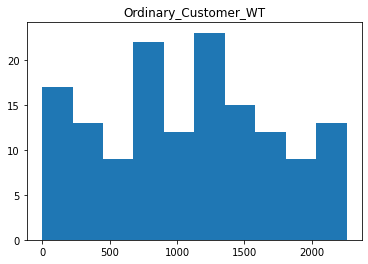

In [ ]:
import matplotlib.pyplot as plt
# graph for Ordinary Customer waiting time
plt.hist(Ordinary_Customer_WT)
plt.title('Ordinary_Customer_WT')
plt.show() 

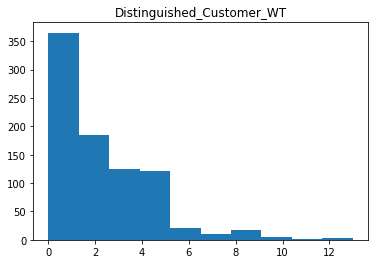

In [ ]:
# graph for Distinguished Customer waiting time
plt.hist(Distinguished_Customer_WT)
plt.title('Distinguished_Customer_WT')
plt.show() 